Criando o DataFrame

In [2]:
import pandas as pd
from datetime import datetime
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

# Criação do dataset

n = range(250) # numero de linhas

# Dicionário com as categorias e os produtos correspondentes
category_produto = {        
    'Periférico': ['Monitor', 'Mouse', 'Teclado'],
    'Hardware': ['Processador', 'Placa de Video', 'SSD']
}

location = ['São Paulo', 'Bauru', 'São José dos Campos', 'Torrinha']
data_range = pd.date_range(start = datetime(2023,1,1), end = datetime(2023,9,7), freq='D')

# Função para selecionar categoria e produto corretos
categorias_array = []
product_array = []

for _ in n:
    category = rd.choice(list(category_produto.keys()))  # Seleciona uma categoria
    produto = rd.choice(category_produto[category])  # Seleciona um produto vinculado à categoria
    categorias_array.append(category)
    product_array.append(produto)

# Criação do dataset
data_market = {
    'Id_Produto': list(n),
    'Produto': product_array,
    'Categoria': categorias_array,
    'Preço_Unitário': [round(rd.uniform(250,2000), 2) for _ in n],
    'Quantidade Vendida': [int(rd.uniform(1,80)) for _ in n],
    'Id_loja': list(n),
    'Localidade': [rd.choice(location) for _ in n],
    'Data_Venda': data_range
}

# Criação do dataframe
df_market = pd.DataFrame(data_market)

# Criando preço total

df_market['Preço_Total'] = df_market['Preço_Unitário'] * df_market['Quantidade Vendida']

print(df_market.to_string(index=False))

 Id_Produto        Produto  Categoria  Preço_Unitário  Quantidade Vendida  Id_loja          Localidade Data_Venda  Preço_Total
          0            SSD   Hardware          502.48                   9        0 São José dos Campos 2023-01-01      4522.32
          1    Processador   Hardware          772.59                  32        1           São Paulo 2023-01-02     24722.88
          2          Mouse Periférico         1350.49                  49        2            Torrinha 2023-01-03     66174.01
          3          Mouse Periférico          314.34                  76        3 São José dos Campos 2023-01-04     23889.84
          4        Teclado Periférico          423.83                   2        4 São José dos Campos 2023-01-05       847.66
          5        Teclado Periférico          906.41                  43        5           São Paulo 2023-01-06     38975.63
          6        Monitor Periférico         1435.17                  18        6 São José dos Campos 2023-01-

ANÁLISE EXPLORATÓRIA

    Qual é o total de vendas por produto?

In [4]:
df_market.groupby('Produto')['Quantidade Vendida'].sum()

Produto
Monitor           1578
Mouse             2270
Placa de Video    1235
Processador       1903
SSD               1330
Teclado           1809
Name: Quantidade Vendida, dtype: int64

    Qual é a loja que vendeu mais produtos?

In [5]:
df_aux = df_market.groupby('Localidade')['Quantidade Vendida'].sum()
print((df_aux.sort_values(ascending=False)))

Localidade
São Paulo              2801
Torrinha               2601
São José dos Campos    2415
Bauru                  2308
Name: Quantidade Vendida, dtype: int64


    Qual categoria de produto teve mais vendas em termos de quantidade?

In [6]:
df_aux = df_market.groupby('Categoria')['Quantidade Vendida'].sum()
print(df_aux.sort_values(ascending=False))

Categoria
Periférico    5657
Hardware      4468
Name: Quantidade Vendida, dtype: int64


ANÁLISE TEMPORAL

    Identifique qual mês do ano teve mais vendas (quantidade) e qual mês gerou mais receita (valor total de vendas)

In [7]:
# Criar a coluna de meses a partir da coluna Data_Venda
df_market['Mes_Venda'] = pd.to_datetime(df_market['Data_Venda']).dt.strftime('%B')

# Mes co0m mais vendas
df_vendas = df_market.groupby('Mes_Venda')['Quantidade Vendida']
print(df_vendas.max().sort_values(ascending=False))

print()

# Mes com mais receita
df_receita = df_market.groupby('Mes_Venda')['Preço_Total']
print(df_receita.max().sort_values(ascending=False))

Mes_Venda
April        79
August       79
February     79
June         79
January      78
May          77
March        77
July         76
September    71
Name: Quantidade Vendida, dtype: int64

Mes_Venda
May          153176.87
January      147341.04
June         147170.20
February     143775.34
August       140350.21
April        136249.96
March        135192.52
July         118092.00
September     74747.38
Name: Preço_Total, dtype: float64


AGRUPAMENTO DE DADOS

    Agrupe os dados por categoria e calcule a média de vendas por produto dentro de cada categoria

In [73]:
# Agrupando os dados
df_agrupado = df_market.groupby(['Categoria', 'Produto'])['Quantidade Vendida'].mean().reset_index()

print(df_agrupado.to_string(index=False))

 Categoria        Produto  Quantidade Vendida
  Hardware Placa de Video           44.821429
  Hardware    Processador           41.000000
  Hardware            SSD           42.189189
Periférico        Monitor           41.791667
Periférico          Mouse           42.666667
Periférico        Teclado           41.600000


    Quais produtos tiveram as melhores vendas em cada localidade?

In [74]:
# Agrupando os dados
df_vendas = df_market.groupby(['Localidade', 'Produto'])['Preço_Total'].sum().reset_index()

# Encontrar o produto com a maior venda em cada localidade
idx_max_vendas = df_vendas.groupby('Localidade')['Preço_Total'].idxmax()

# Selecionar os produtos com a melhor venda em cada localidade
melhores_vendas_por_localidade = df_vendas.loc[idx_max_vendas]

print(melhores_vendas_por_localidade.to_string(index=False))

         Localidade        Produto  Preço_Total
              Bauru Placa de Video    589014.66
São José dos Campos        Monitor    929546.08
          São Paulo Placa de Video    642432.33
           Torrinha Placa de Video    767185.21


CRIAÇÃO DE GRÁFICOS

    Crie gráficos de barras para visualizar as vendas por produto e por loja.

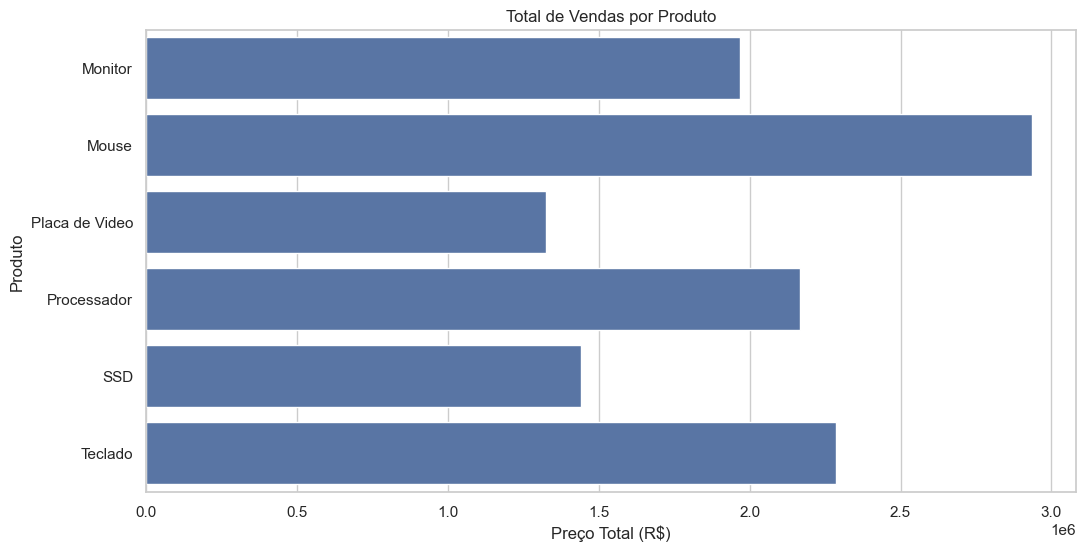

C:\Users\pirsp\AppData\Local\Temp\ipykernel_17992\1145322713.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Preço_Total', y='Id_loja', data=sales_by_store, palette='magma')


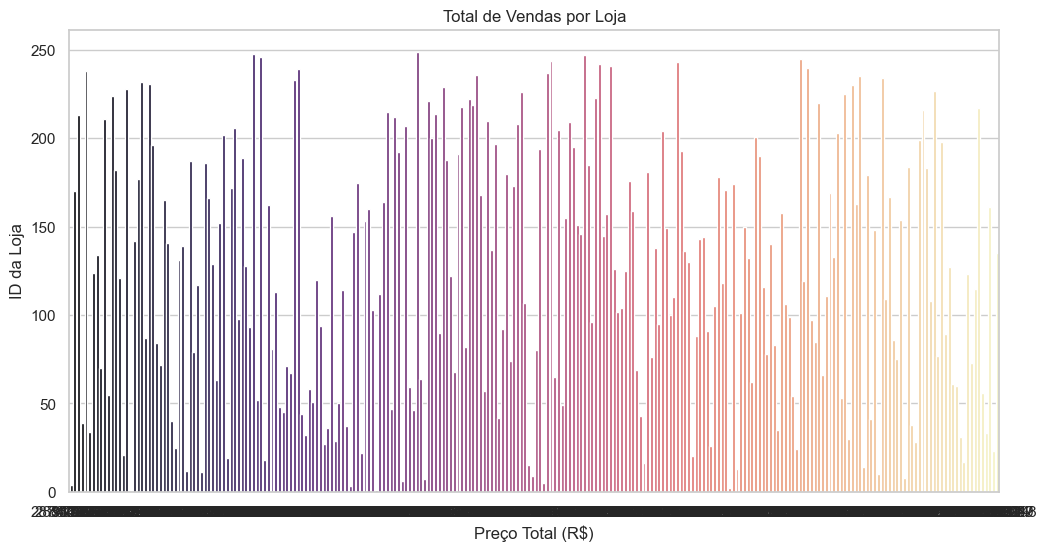

In [3]:
# Configurando o estilo do seaborn
sns.set(style="whitegrid")

# Gráfico de barras para vendas por produto
plt.figure(figsize=(12, 6))
sales_by_product = df_market.groupby('Produto')['Preço_Total'].sum().reset_index()
sns.barplot(x='Preço_Total', y='Produto', data=sales_by_product)
plt.title('Total de Vendas por Produto')
plt.xlabel('Preço Total (R$)')
plt.ylabel('Produto')
plt.show()

# Gráfico de barras para vendas por loja
plt.figure(figsize=(12, 6))
sales_by_store = df_market.groupby('Id_loja')['Preço_Total'].sum().reset_index()
sns.barplot(x='Preço_Total', y='Id_loja', data=sales_by_store, palette='magma')
plt.title('Total de Vendas por Loja')
plt.xlabel('Preço Total (R$)')
plt.ylabel('ID da Loja')
plt.show()

    Crie um gráfico de linha para mostrar a evolução das vendas ao longo do tempo.